# Image visualization

Download this image: [Link to ND2 multipage, multichannel Z-stack](https://drive.google.com/file/d/1g4PuEQoV5ICiCSg9-JV3VXi3v3JvynHn/view?usp=drive_link)

Place the image in the same folder as this script. 

In [4]:
import nd2 #this is to read ND2 files
import numpy as np #this is to manipulate arrays
import matplotlib.pyplot as plt #this is to display stuff

now I will import the image

In [5]:
my_image = nd2.imread("A.nd2") #type your image name

## Image dimensions

A single frame of an imageset will have dimensions as X * Y, defined by the resolution as which it was captured. Usually 2048 * 2048 or 1024 * 1204 on the Nikon. 

If the image contains 5 channels, the dimensions are 5 * 1024 * 1024 (assuming 1024*1024 resolution). 

Adding 10 z slices, the dimensions are 10 x 5 x 1024 x 1024

Adding 4 positions on the sample, the dimensions are 4 x 10 x 5 x 1024 x 1024. 

This is how positioning generally works for ND2 files. CZI files have a different file structure where channels and Z might be swapped. Either way, you must know the anatomy of your dataset


### Checking image shape
The varaible my_image is a numpy array. This variable has some functions built into it by virtue of being a numpy array. One of these functions is the shape function. 

In [6]:
print(my_image.shape)

(3, 66, 4, 2304, 4096)


I will now select position 1, all slices, channel 1, all pixels: 
Remember in Python, the counting starts at 0, not 1. 

In [ ]:
image1 = my_image[0, :, 0, :, :] ## : indicates "everything"
print(image1.shape) # see how the shape changes - we will lose 2 dimensions

(66, 2304, 4096)


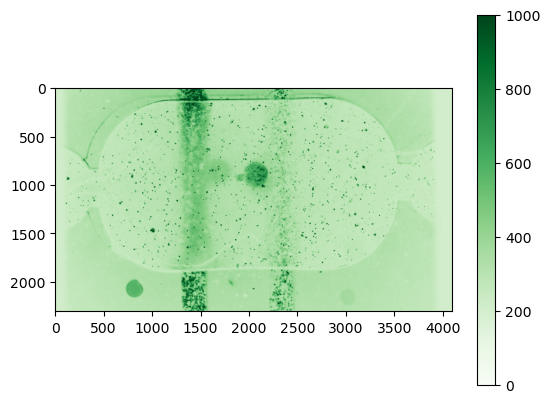

In [8]:
plt.imshow(image1[30, :,:], vmin=0, vmax=1000, cmap = "Greens") # display z slice 30
plt.colorbar()

In [ ]:
max_proj = np.max(image1, axis = 0) # max_project the image along the Z-axis
print(max_proj.shape) # see how the shape changes as we max project

(2304, 4096)


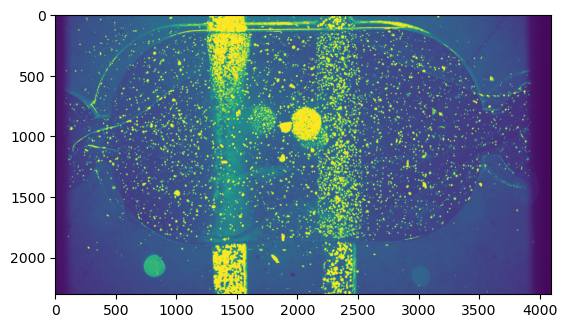

In [10]:
plt.imshow(max_proj, vmax=1000)

In [13]:
from microfilm.microplot import microshow # this is a package that displays images with imageJ type colormaps


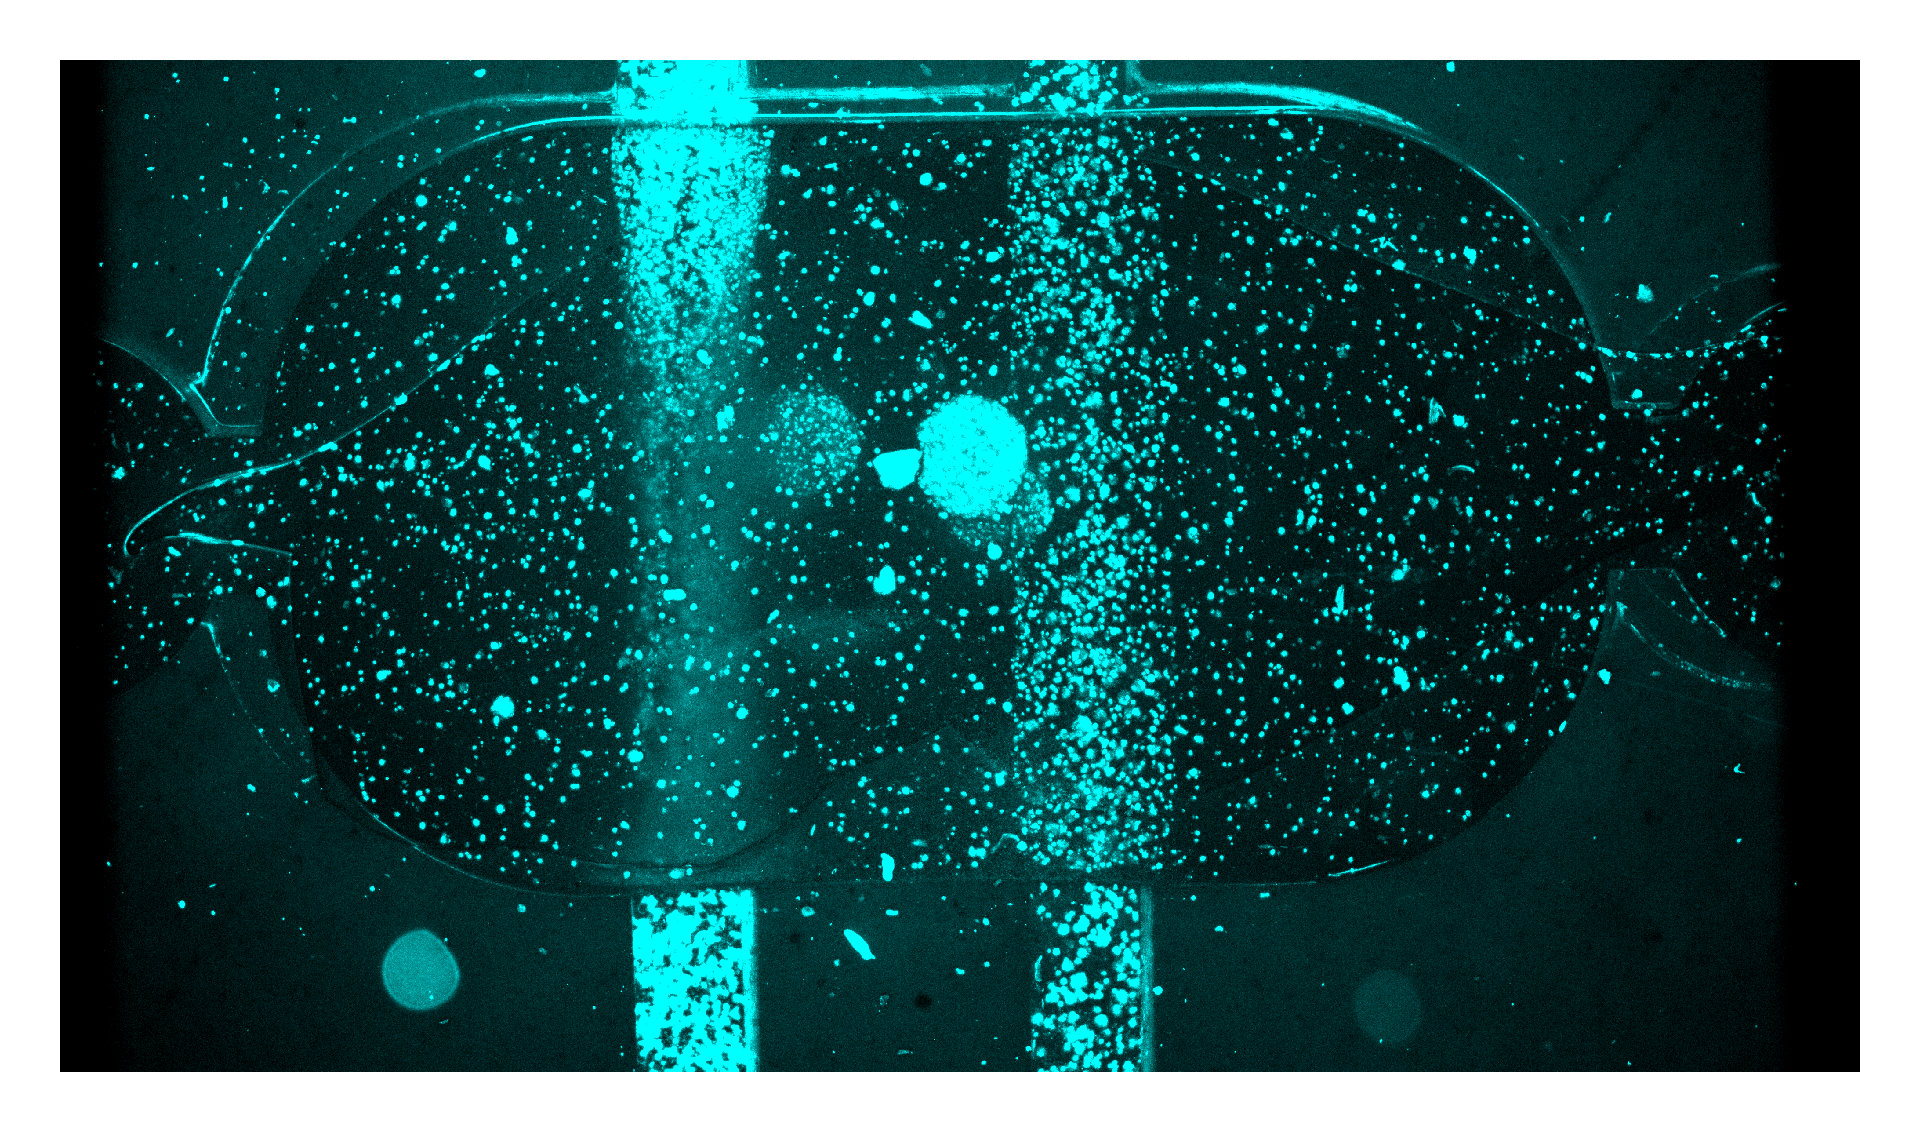

In [18]:
microshow(max_proj, rescale_type = 'limits', limits =[300, 1000], dpi = 600, cmaps ="cyan" )